In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/New_York_reviews.csv')

# Display basic information
print(df.info())  # Check for missing values and data types
print(df.head())  # View the first few rows of the dataset


/tmp/ipykernel_10649/957038145.py:4: DtypeWarning: Columns (0,1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/New_York_reviews.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510463 entries, 0 to 510462
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       510463 non-null  object
 1   parse_count      510463 non-null  object
 2   restaurant_name  510463 non-null  object
 3   rating_review    510463 non-null  object
 4   sample           510463 non-null  object
 5   review_id        510463 non-null  object
 6   title_review     510460 non-null  object
 7   review_preview   510462 non-null  object
 8   review_full      510461 non-null  object
 9   date             510461 non-null  object
 10  city             510461 non-null  object
 11  url_restaurant   510461 non-null  object
 12  author_id        510461 non-null  object
dtypes: object(13)
memory usage: 50.6+ MB
None
  Unnamed: 0 parse_count restaurant_name rating_review    sample  \
0          1           2            Lido             5  Positive   
1          2    

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Missing Values:
 Unnamed: 0         0
parse_count        0
restaurant_name    0
rating_review      0
sample             0
review_id          0
title_review       3
review_preview     1
review_full        2
date               2
city               2
url_restaurant     2
author_id          2
dtype: int64
Number of duplicate rows: 0


In [6]:

# Distribution of `rating_review`
print(df['rating_review'].value_counts())

# Distribution of `sample` (positive/negative)
print(df['sample'].value_counts())


rating_review
5                         227762
4                         138785
3                          46988
5                          31210
4                          22006
2                          17553
1                          13839
3                           7356
2                           2759
1                           2204
New_York_City_New_York         1
Name: count, dtype: int64
sample
Positive                                                                                                                419763
Negative                                                                                                                 90699
https://www.tripadvisor.com/Restaurant_Review-g60763-d477523-Reviews-or290-Rosa_Mexicano-New_York_City_New_York.html         1
Name: count, dtype: int64


count    510463.000000
mean        442.990050
std         373.884011
min           3.000000
25%         208.000000
50%         336.000000
75%         551.000000
max       12106.000000
Name: review_length, dtype: float64


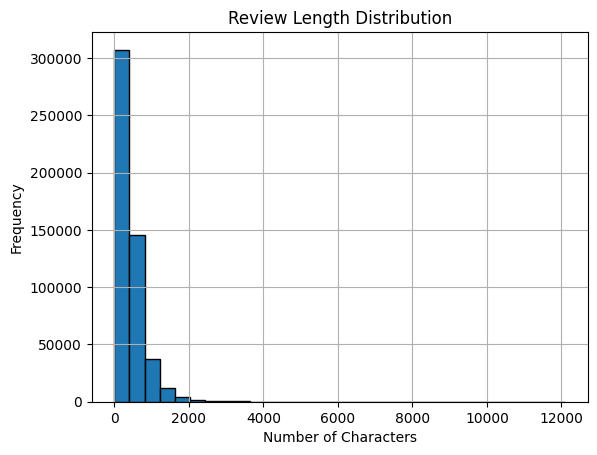

In [7]:
import matplotlib.pyplot as plt


# Calculate review length
df['review_length'] = df['review_full'].apply(lambda x: len(str(x)))

# Summary statistics of review lengths
print(df['review_length'].describe())

# Optional: Plot review length distribution
df['review_length'].hist(bins=30, edgecolor='black')
plt.title('Review Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


## cleanup

In [9]:
#cleanup

# Convert to numeric, coercing errors to NaN
df['rating_review'] = pd.to_numeric(df['rating_review'], errors='coerce')
df['parse_count'] = pd.to_numeric(df['parse_count'], errors='coerce')


In [16]:
# Remove invalid (NaN) entries and create a new copy
df = df[df['rating_review'].notna()].copy()  # Ensure we work with a new DataFrame
df['rating_review'] = df['rating_review'].astype(int)  # Convert to integer safely


In [18]:
print(df['rating_review'].value_counts())
print(df.info())  # Verify no warnings or mixed types

rating_review
5    258972
4    160791
3     54344
2     20312
1     16043
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 510462 entries, 0 to 510462
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   restaurant_name  510462 non-null  object
 1   rating_review    510462 non-null  int64 
 2   sample           510462 non-null  object
 3   review_id        510462 non-null  object
 4   title_review     510460 non-null  object
 5   review_preview   510462 non-null  object
 6   review_full      510461 non-null  object
 7   date             510461 non-null  object
 8   city             510461 non-null  object
 9   url_restaurant   510461 non-null  object
 10  author_id        510461 non-null  object
 11  review_length    510462 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 50.6+ MB
None


In [ ]:
# Remove invalid entries in `sample`
df = df[df['sample'].isin(['Positive', 'Negative'])]


In [19]:
# Inspect reviews with unusually high lengths
long_reviews = df[df['review_length'] > 3000]
print(long_reviews[['review_full', 'review_length']])

# Optionally, drop reviews with extreme lengths if irrelevant
df = df[df['review_length'] <= 3000]


                                              review_full  review_length
111     Lunch in Hell's Kitchen, Midtown West summons ...           3675
4735    Had two great dinners and a breakfast in the P...           3273
5056    First the food: My rating scale ranges from po...           3634
5074    We entered the beautiful Buddakan expecting to...           6015
5267    A couple of years ago on a vacation to New Yor...           3186
...                                                   ...            ...
507067  There is not much I can say that is positive a...           4061
508057  For several years now, every time we headed in...           6729
508132  What’s this? A secret restaurant in NYC? One, ...           3308
508152  When we went to Oda house for Georgian food, I...           3266
508810  Is this the real life?  Is this just fantasy? ...           4273

[849 rows x 2 columns]


rating_review
5    258734
4    160625
3     54201
2     20166
1     15887
Name: count, dtype: int64
sample
Positive    419359
Negative     90254
Name: count, dtype: int64


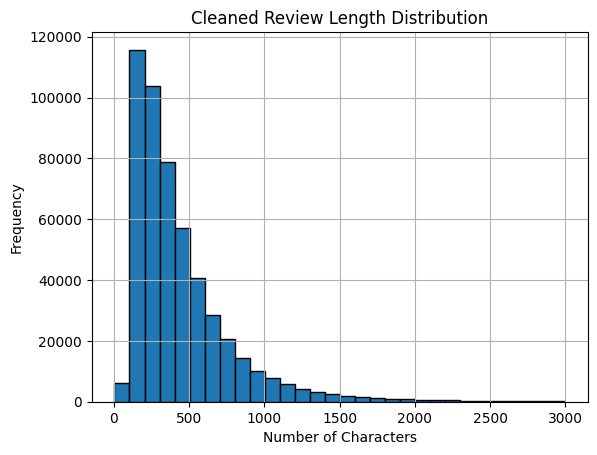

In [20]:
# Confirm class distribution
print(df['rating_review'].value_counts())
print(df['sample'].value_counts())

# Plot clean review length distribution
df['review_length'].hist(bins=30, edgecolor='black')
plt.title('Cleaned Review Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


In [22]:
# Drop rows where `review_full` or `rating_review` is missing
df = df.dropna(subset=['review_full', 'rating_review'])

# Fill missing values in other columns
df['title_review'] = df['title_review'].fillna('No Title')
df['date'] = df['date'].fillna('Unknown Date')


In [24]:
# Correlation between rating and review length
correlation = df[['rating_review', 'review_length']].corr()
print("Correlation Matrix:\n", correlation)


Correlation Matrix:
                rating_review  review_length
rating_review        1.00000       -0.18043
review_length       -0.18043        1.00000


In [23]:

# Display basic information
print(df.info())  # Check for missing values and data types
print(df.head())  # View the first few rows of the dataset


<class 'pandas.core.frame.DataFrame'>
Index: 509612 entries, 0 to 510462
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   restaurant_name  509612 non-null  object
 1   rating_review    509612 non-null  int64 
 2   sample           509612 non-null  object
 3   review_id        509612 non-null  object
 4   title_review     509612 non-null  object
 5   review_preview   509612 non-null  object
 6   review_full      509612 non-null  object
 7   date             509612 non-null  object
 8   city             509612 non-null  object
 9   url_restaurant   509612 non-null  object
 10  author_id        509612 non-null  object
 11  review_length    509612 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 50.5+ MB
None
  restaurant_name  rating_review    sample         review_id  \
0            Lido              5  Positive  review_773559838   
1            Lido              4  Positive  review_769429529   
2

In [25]:
df.to_csv('../data/New_York_reviews_cleaned.csv', index=False)
